In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from matplotlib import cm
import seaborn as sns

from astropy.io import fits
from astropy.wcs import WCS
from scipy.ndimage.filters import gaussian_filter


In [3]:
def read_map(filename):
    
    hdu = fits.open(inputdir+filename)
    data = hdu[0].data
    header = hdu[0].header 
    #wcs = WCS(header).celestial 
                
    return data
    

def crop(data, broad, vel):
    
    if broad == True and vel==False:
        for i in range(20):
            for j in range(20):
                 if i>14 or j>14:    # for broad-Ha map, remove bad-fit pixels 
                    data[i,j] = 0.0
    
                 if i<4 and j<4:    
                    data[i,j] = 0.0
                    
    elif broad==True and vel==True:
        
        for i in range(20):
            for j in range(20):
                if i>15 or j>15:    # for broad Ha vel, remove bad-fit pixels 
                    data[i,j] = np.nan
        for i in range(4):
            for j in range(20):
                data[i,j] = np.nan 
        for i in range(20):
            for j in range(4):
                data[i,j] = np.nan
                    
    return data


In [5]:
def range_30pix():
    sampling_size = 0.125        # arcsec/pix 
    size_x = 30
    size_y = 30
    Ha_x,Ha_y = 10, 9
    (x_min,x_max) = (-(Ha_x+0.5)*sampling_size,(size_x-1-Ha_x-0.5)*sampling_size)
    (y_min,y_max) = (-(Ha_y+0.5)*sampling_size,(size_y-1-Ha_y-0.5)*sampling_size)
    
    return x_min,x_max,y_min,y_max


def signal(data, rms):
        
    newmap = np.zeros((30,30))
    
    for i in range(30):
        for j in range(30):
            if data[i,j]>2*rms:
                newmap[i,j] = data[i,j]    # select pixels with S/N > 2
            else:
                newmap[i,j] = 0.0
                
    return newmap


def contours(rms_sigma):
    
    l= []
    for i in range(0,10):
        l.append((2*i+1)*rms_sigma)      # 3sigma and above
    
    return l

In [25]:
def plot(maps):
    
    plt.rcParams["figure.figsize"] = (10,9)
    plt.rcParams['axes.linewidth'] = 0.6
    plt.rcParams['axes.edgecolor'] = 'k'
    plt.rcParams['font.family'] = 'sans-serif' 
    plt.rcParams['contour.negative_linestyle'] = 'solid'

    fig, ax = plt.subplots(2, 3, layout='constrained')
    #gs0 = gridspec.GridSpec(2, 3, figure=fig)

    cm1 = 'jet'
    #cm2 = 'bwr'
    cm2 = 'seismic'
    cm3 = 'gist_heat_r'
    
    for a in range(2): 
        for b in range(3): 
            ax[a,b].plot()
            ax[0,b].set_xlim([-1.3,1.0])
            ax[0,b].set_ylim([-1.3,1.1]) 
            ax[1,b].set_xlim([-1.5,2.5])
            ax[1,b].set_ylim([-1.4,2.6]) 
            ax[1,b].set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
    
    for axis in fig.get_axes():
        axis.tick_params(axis='both', color='k',direction='in',which='major', bottom=True, top=True, 
                         left=True, right=True, length=2, labelsize=8)
        axis.set_xlabel('$\delta$x [arcsec]', fontsize=10)
        axis.set_ylabel('$\delta$y [arcsec]', fontsize=10)
        
        
    (x_min,x_max,y_min,y_max) = range_30pix()
    
    
    im00 = ax[0,0].imshow(maps[0], origin='lower', vmax=10, cmap=cm1, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max])
    
    cbar00 = fig.colorbar(im00, ax=ax[0,0], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar00.set_label(r'F (H$\alpha$-broad)', labelpad=6, fontsize=14)
    cbar00.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar00.ax.locator_params(nbins=5)
    cbar00.outline.set_visible(True)
    
    
    im10 = ax[1,0].imshow(maps[1], origin='lower', vmax=30, cmap=cm1, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max])

    cbar10 = fig.colorbar(im10, ax=ax[1,0], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar10.set_label(r'F (H$\alpha$-narrow)', labelpad=6, fontsize=14)
    cbar10.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar10.ax.locator_params(nbins=5)
    cbar10.outline.set_visible(True)
    
    
    im01 = ax[0,1].imshow(maps[2], origin='lower', vmin=-500, vmax=500, cmap=cm2, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.8)

    cbar01 = fig.colorbar(im01, ax=ax[0,1], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar01.set_label(r'v (H$\alpha$-broad)  [km/s]', labelpad=6, fontsize=14)
    cbar01.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar01.ax.locator_params(nbins=5)
    cbar01.outline.set_visible(True)
    
    
    im02 = ax[0,2].imshow(maps[3], origin='lower', vmin=0, vmax=1000, cmap=cm3, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.8)

    cbar02 = fig.colorbar(im02, ax=ax[0,2], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar02.set_label(r'$\sigma$ (H$\alpha$-broad)  [km/s]', labelpad=6, fontsize=14)
    cbar02.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar02.ax.locator_params(nbins=5)
    cbar02.outline.set_visible(True)
    
    
    im11 = ax[1,1].imshow(maps[4], origin='lower', vmin=-300, vmax=300, cmap=cm2, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.8)

    cbar11 = fig.colorbar(im11, ax=ax[1,1], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar11.set_label(r'v (H$\alpha$-narrow)  [km/s]', labelpad=6, fontsize=14)
    cbar11.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar11.ax.locator_params(nbins=5)
    cbar11.outline.set_visible(True)
    
    
    im12 = ax[1,2].imshow(maps[5], origin='lower', vmin=0, vmax=220, cmap=cm3, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.8)

    cbar12 = fig.colorbar(im12, ax=ax[1,2], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar12.set_label(r'$\sigma$ (H$\alpha$-narrow)  [km/s]', labelpad=6, fontsize=14)
    cbar12.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar12.ax.locator_params(nbins=5)
    cbar12.outline.set_visible(True)


In [ ]:
inputdir = '/Users/orion/phd_research/3C297/maps/fov_map/'

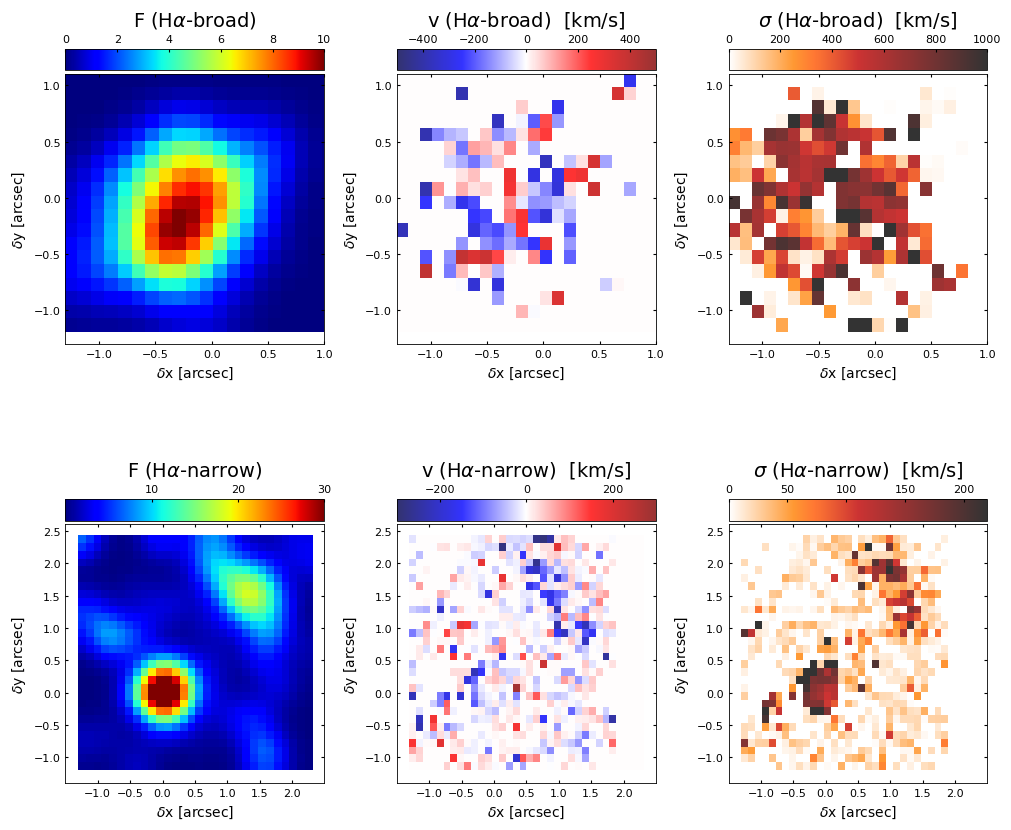

In [26]:
maps1 = []


#broad Halpha flux
data00 = read_map('ampHaB_map.fits')
data00 = crop(data00, True, False)
maps1.append(map00)


#narrow Halpha flux
data10 = read_map('ampHa_map.fits')
maps1.append(map10)


#broad velocity
data01 = read_map('velb_map.fits')
#map01 = crop(data01, True, True)
maps1.append(data01)


#broad vel dispersion 
data02 = read_map('velsigb_map.fits')
maps1.append(data02)


#narrow velocity
data11 = read_map('veln_map.fits')
maps1.append(data11)


#narrow vel dispersion
data12 = read_map('velsign_map.fits')
maps1.append(data12)


plot(maps1)
#plt.savefig('Ha_BnN_maps2.pdf',facecolor='w', dpi=1000, bbox_inches='tight', pad_inches=0.3)

In [16]:
def plotwithcontours(maps):
    
    plt.rcParams["figure.figsize"] = (10,9)
    plt.rcParams['axes.linewidth'] = 0.6
    plt.rcParams['axes.edgecolor'] = 'k'
    plt.rcParams['font.family'] = 'sans-serif' 
    plt.rcParams['contour.negative_linestyle'] = 'solid'

    fig, ax = plt.subplots(2, 3, layout='constrained')
    #gs0 = gridspec.GridSpec(2, 3, figure=fig)

    cm1 = 'jet'
    cm2 = 'seismic'
    #cm2 = sns.color_palette("vlag", as_cmap=True)
    cm3 = 'gist_heat'
    #cm3 = sns.color_palette("rocket", as_cmap=True)
    
    
    for a in range(2): 
        for b in range(3): 
            ax[a,b].plot()
            ax[0,b].set_xlim([-1.3,1.0])
            ax[0,b].set_ylim([-1.3,1.1]) 
            ax[1,b].set_xlim([-1.5,2.5])
            ax[1,b].set_ylim([-1.4,2.6]) 
            ax[1,b].set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
    
    for axis in fig.get_axes():
        axis.tick_params(axis='both', color='k',direction='in',which='major', bottom=True, top=True, 
                         left=True, right=True, length=2, labelsize=8)
        axis.set_xlabel('$\delta$x [arcsec]', fontsize=10)
        axis.set_ylabel('$\delta$y [arcsec]', fontsize=10)
        
        
    (x_min,x_max,y_min,y_max) = range_30pix()
    
    
    im00 = ax[0,0].imshow(maps[0], origin='lower', vmax=10, cmap=cm1, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max])
    ax[0,0].contour(maps[0], levels=[5,6,7,8,9,10], colors='k', linewidths=0.6,
                          extent = [x_min,x_max,y_min,y_max])
    
    cbar00 = fig.colorbar(im00, ax=ax[0,0], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar00.set_label(r'F (H$\alpha$-broad)', labelpad=6, fontsize=14)
    cbar00.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar00.ax.locator_params(nbins=5)
    cbar00.outline.set_visible(True)
    
    
    im10 = ax[1,0].imshow(maps[1], origin='lower', vmax=30, cmap=cm1, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max])
    ax[1,0].contour(maps[1], levels=[5, 6, 10, 15, 20, 25, 30], colors='k', linewidths=0.6,
                          extent = [x_min,x_max,y_min,y_max])
    
    cbar10 = fig.colorbar(im10, ax=ax[1,0], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar10.set_label(r'F (H$\alpha$-narrow)', labelpad=6, fontsize=14)
    cbar10.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar10.ax.locator_params(nbins=5)
    cbar10.outline.set_visible(True)
    
    
    im01 = ax[0,1].imshow(maps[2], origin='lower', vmin=-500, vmax=500, cmap=cm2, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.8)
    ax[0,1].contour(maps[0], levels=[5,6,7,8,9,10], colors='k', linewidths=0.6,
                          extent = [x_min,x_max,y_min,y_max])
    
    cbar01 = fig.colorbar(im01, ax=ax[0,1], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar01.set_label(r'v (H$\alpha$-broad)  [km/s]', labelpad=6, fontsize=14)
    cbar01.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar01.ax.locator_params(nbins=5)
    cbar01.outline.set_visible(True)
    
    
    im02 = ax[0,2].imshow(maps[3], origin='lower', vmin=0, vmax=1000, cmap=cm3, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.9)
    ax[0,2].contour(maps[0], levels=[5,6,7,8,9,10], colors='w', linewidths=0.6,
                          extent = [x_min,x_max,y_min,y_max])
    
    cbar02 = fig.colorbar(im02, ax=ax[0,2], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar02.set_label(r'$\sigma$ (H$\alpha$-broad)  [km/s]', labelpad=6, fontsize=14)
    cbar02.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar02.ax.locator_params(nbins=5)
    cbar02.outline.set_visible(True)
    
    
    im11 = ax[1,1].imshow(maps[4], origin='lower', vmin=-300, vmax=300, cmap=cm2, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.8)
    ax[1,1].contour(maps[1], levels=[5, 6, 10, 15, 20, 25, 30], colors='k', linewidths=0.6,
                          extent = [x_min,x_max,y_min,y_max])
    
    cbar11 = fig.colorbar(im11, ax=ax[1,1], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar11.set_label(r'v (H$\alpha$-narrow)  [km/s]', labelpad=6, fontsize=14)
    cbar11.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar11.ax.locator_params(nbins=5)
    cbar11.outline.set_visible(True)
    
    
    im12 = ax[1,2].imshow(maps[5], origin='lower', vmin=0, vmax=220, cmap=cm3, interpolation ='nearest', 
                          extent = [x_min,x_max,y_min,y_max], alpha=0.9)
    ax[1,2].contour(maps[1], levels=[5, 6, 10, 15, 20, 25, 30], colors='w', linewidths=0.6,
                          extent = [x_min,x_max,y_min,y_max])

    cbar12 = fig.colorbar(im12, ax=ax[1,2], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar12.set_label(r'$\sigma$ (H$\alpha$-narrow)  [km/s]', labelpad=6, fontsize=14)
    cbar12.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar12.ax.locator_params(nbins=5)
    cbar12.outline.set_visible(True)
    

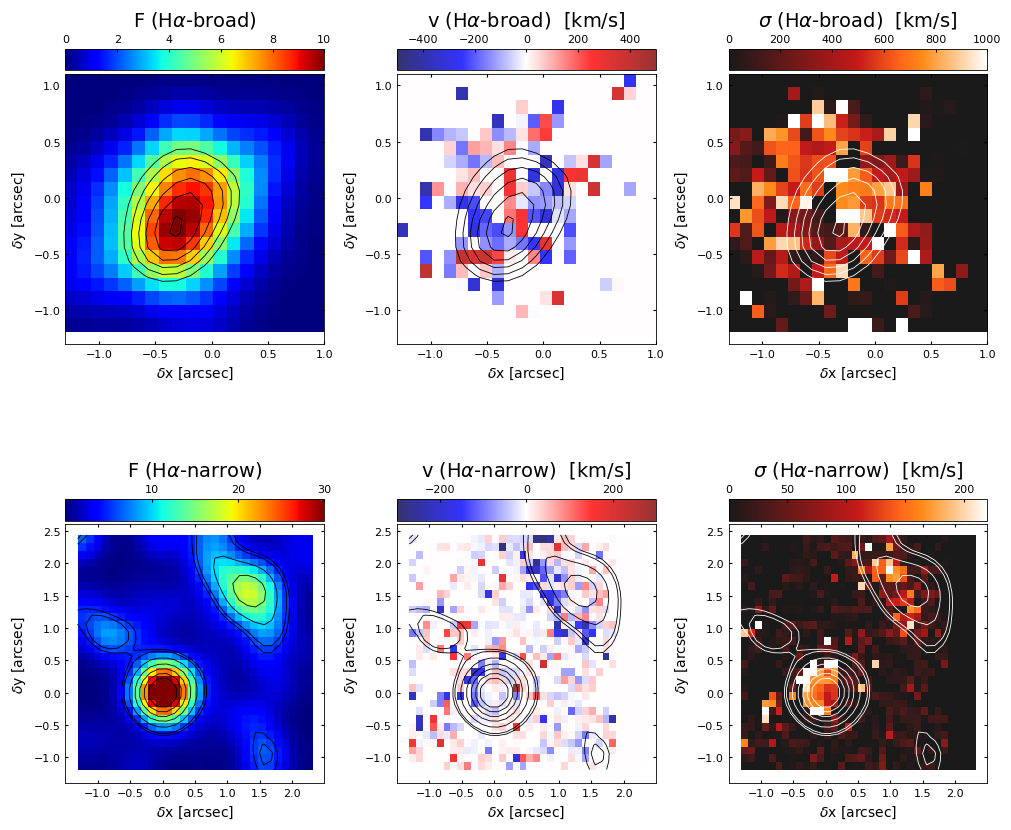

In [17]:
maps3 = []


#broad Halpha flux
data00 = read_map('ampHaB_map.fits')
data00 = crop(data00, True, False)
map00 = gaussian_filter(map00, 2.0)
maps3.append(map00)


#narrow Halpha flux
data10 = read_map('ampHa_map.fits')
map10 = gaussian_filter(map10, 2.0)
maps3.append(map10)


#broad velocity
data01 = read_map('velb_map.fits')
#map01 = crop(data01, True, True)
maps3.append(data01)


#broad vel dispersion 
data02 = read_map('velsigb_map.fits')
maps3.append(data02)


#narrow velocity
data11 = read_map('veln_map.fits')
maps3.append(data11)


#narrow vel dispersion
data12 = read_map('velsign_map.fits')
maps3.append(data12)



plotwithcontours(maps3)
#plt.savefig('fluxcontours_Ha_BnN_maps.pdf',facecolor='w', dpi=1000, bbox_inches='tight', pad_inches=0.3)

In [27]:
def plot(maps):
    
    plt.rcParams["figure.figsize"] = (7,4)
    plt.rcParams['axes.linewidth'] = 0.6
    plt.rcParams['axes.edgecolor'] = 'k'
    plt.rcParams['font.family'] = 'sans-serif' 
    plt.rcParams['contour.negative_linestyle'] = 'solid'

    fig, ax = plt.subplots(1, 2, layout='constrained')
    #gs0 = gridspec.GridSpec(2, 3, figure=fig)

    cm1 = 'jet'
    
    for b in range(2): 
        ax[b].plot()
        ax[b].set_xlim([-1.5,2.5])
        ax[b].set_ylim([-1.4,2.6]) 
        ax[b].set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
    
    for axis in fig.get_axes():
        axis.tick_params(axis='both', color='k',direction='in',which='major', bottom=True, top=True, 
                         left=True, right=True, length=2, labelsize=8)
        axis.set_xlabel('$\delta$x [arcsec]', fontsize=10)
        axis.set_ylabel('$\delta$y [arcsec]', fontsize=10)
        
        
    (x_min,x_max,y_min,y_max) = range_30pix()
    
    
    im00 = ax[0].imshow(maps[0], origin='lower', vmax=10, cmap=cm1, interpolation ='none', 
                          extent = [x_min,x_max,y_min,y_max])
    cbar00 = fig.colorbar(im00, ax=ax[0], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar00.set_label(r'F ([N II])', labelpad=6, fontsize=14)
    cbar00.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar00.ax.locator_params(nbins=5)
    cbar00.outline.set_visible(True)
    
    
    im10 = ax[1].imshow(maps[1], origin='lower', vmax=10, cmap=cm1, interpolation ='none', 
                          extent = [x_min,x_max,y_min,y_max])
    cbar10 = fig.colorbar(im10, ax=ax[1], location='top', pad = 0.01, aspect=12)#, format= "%.1f")
    cbar10.set_label(r'F ([S II])', labelpad=6, fontsize=14)
    cbar10.ax.tick_params(direction='in', labelsize=8, length=2)
    cbar10.ax.locator_params(nbins=5)
    cbar10.outline.set_visible(True)
    
    

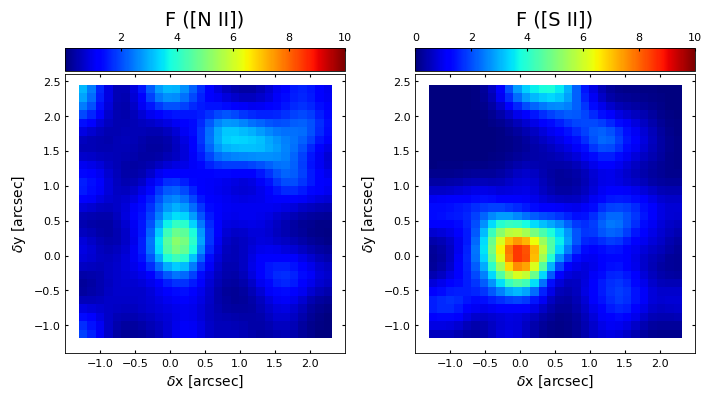

In [28]:
maps4 = []


#narrrow NII flux
data00 = read_map('ampNII_map.fits')
map00 = signal(data00, 3)  

#narrow SII flux
data01 = read_map('ampSII_map.fits')
ma
p01 = signal(data01, 4)  


c_map00, c_map01 = np.zeros([30,30]), np.zeros([30,30])

for i in range(30):
    for j in range(34):
        if j<30:
            c_map00[j,i] = map00[j,i]
            c_map01[j,i] = map01[j,i]


map00 = gaussian_filter(map00, 2.0)
maps4.append(map00)

map01 = gaussian_filter(map01, 2.0)
maps4.append(map01)


plot(maps4)
#plt.savefig('narrow.png',facecolor='w', dpi=2000, bbox_inches='tight', pad_inches=0.3)

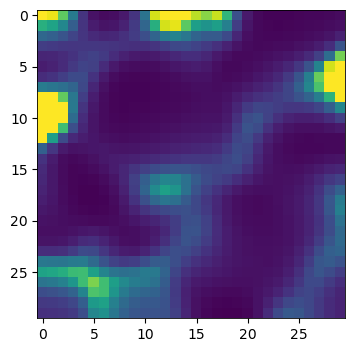

In [36]:
# ratio:  NII / Halpha

plt.imshow(maps4[0]/maps1[1], vmax=3)